# Eksplorasi Data

Nigel Sahl                                       13521043
Akmal Mahardika Nurwahyu P.	13521070
Edia Zaki Naufal Ilman		        13521141

In [1]:
%pip install --upgrade pip && %pip -q -U install pandas numpy matplotlib

/bin/bash: line 1: fg: no job control
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [58]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Preparation

In [7]:
# Import Files
# share-of-education-in-government-expenditure.csv
# average-years-of-schooling-vs-gdp-per-capita.csv
# productivity-vs-educational-attainment.csv
# unemployment-rate.csv
# literacy-rates-vs-average-years-of-schooling.csv
# poverty-vs-mean-schooling.csv
df_education_expenditure = pd.read_csv("share-of-education-in-government-expenditure.csv")
df_education_gdp = pd.read_csv("average-years-of-schooling-vs-gdp-per-capita.csv")
df_education_productivity = pd.read_csv("productivity-vs-educational-attainment.csv")
df_unemployment = pd.read_csv("unemployment-rate.csv")
df_education_literacy = pd.read_csv("literacy-rates-vs-average-years-of-schooling.csv")
df_education_poverty = pd.read_csv("poverty-vs-mean-schooling.csv")
df_names = [
    "share-of-education-in-government-expenditure",
    "average-years-of-schooling-vs-gdp-per-capita",
    "productivity-vs-educational-attainment",
    "unemployment-rate",
    "literacy-rates-vs-average-years-of-schooling",
    "poverty-vs-mean-schooling",    
]
df_list = [
    df_education_expenditure,
    df_education_gdp,
    df_education_productivity,
    df_unemployment,
    df_education_literacy,
    df_education_poverty
]

In [4]:
df_education_expenditure

,Entity,Code,Year,"Government expenditure on education, total (% of government expenditure)"
0,Afghanistan,AFG,2006,14.559212
1,Afghanistan,AFG,2007,10.814692
2,Afghanistan,AFG,2008,4.860586
3,Afghanistan,AFG,2009,6.492490
4,Afghanistan,AFG,2010,6.395580
...,...,...,...,...
3957,Zimbabwe,ZWE,2016,23.527084
3958,Zimbabwe,ZWE,2017,19.691229
3959,Zimbabwe,ZWE,2018,19.158785
3960,Zimbabwe,ZWE,2019,10.463589


## Exploratory Data Analysis

In [5]:
def eda(df, target_column=None, full = False):
    # Step 1: Overview of the Dataset
    print("Dataset Overview:")
    print(f"Number of Rows, Columns: {df.shape}")
    print("\nFirst Five Rows:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
    print("\nMissing Values:\n", df.isnull().sum())

    # Step 2: Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))

    # Step 3: Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Step 4: Duplicate Values
    print("\nDuplicate Values:")
    print(df.duplicated().sum())

    if full:
        # Step 5: Univariate Analysis
        print("\nUnivariate Analysis...")
        # except entitiy and code column
        for col in df.select_dtypes(include='object'):
            if col != 'Entity' and col != 'Code':
                print(f"\n{col} Value Counts:")
                print(df[col].value_counts())
                plt.figure(figsize=(8, 4))
                sns.countplot(data=df, x=col)
                plt.title(f"Distribution of {col}")
                plt.xticks(rotation=45)
                plt.show()

        for col in df.select_dtypes(include=['number']):
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()

        # Step 6: Bivariate Analysis (if target column is specified)
        if target_column and target_column in df.columns:
            print(f"\nBivariate Analysis with Target Column: {target_column}")
            for col in df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore'):
                plt.figure(figsize=(8, 4))
                sns.scatterplot(data=df, x=col, y=target_column)
                plt.title(f"{col} vs {target_column}")
                plt.show()

            for col in df.select_dtypes(include='object'):
                plt.figure(figsize=(8, 4))
                sns.boxplot(data=df, x=col, y=target_column)
                plt.title(f"{col} vs {target_column}")
                plt.xticks(rotation=45)
                plt.show()

        # Step 7: Correlation Analysis
        print("\nCorrelation Analysis:")
        corr_matrix = df.select_dtypes(include=['number']).corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Matrix")
        plt.show()

    # Outliers
    # Use IQR
    outliers = {}
    print("\nOutliers:")
    for col in df.select_dtypes(include=['number']):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        # percentage of outliers
        print(f"{col}: {outliers[col].shape[0]} outliers ({outliers[col].shape[0] / df.shape[0] * 100:.2f}%)")
    
    # use boxplot
    for col in df.select_dtypes(include=['number']):
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=col)
        plt.title(f"Distribution of {col}")
        plt.show()

### EDA Education Expenditure

Dataset Overview:
Number of Rows, Columns: (3962, 4)

First Five Rows:
        Entity Code  Year  \
0  Afghanistan  AFG  2006   
1  Afghanistan  AFG  2007   
2  Afghanistan  AFG  2008   
3  Afghanistan  AFG  2009   
4  Afghanistan  AFG  2010   

   Government expenditure on education, total (% of government expenditure)  
0                                          14.559212                         
1                                          10.814692                         
2                                           4.860586                         
3                                           6.492490                         
4                                           6.395580                         

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Data columns (total 4 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                   

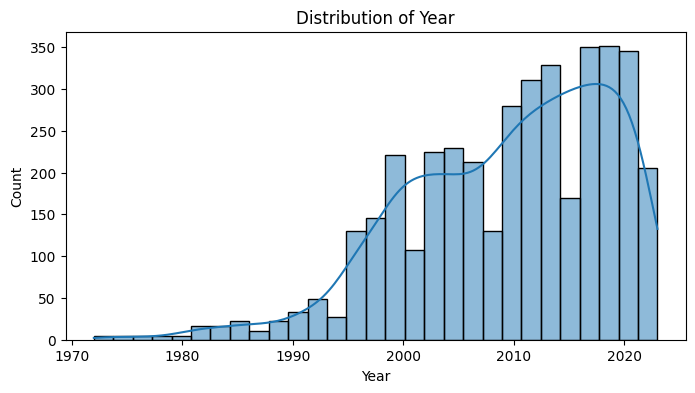

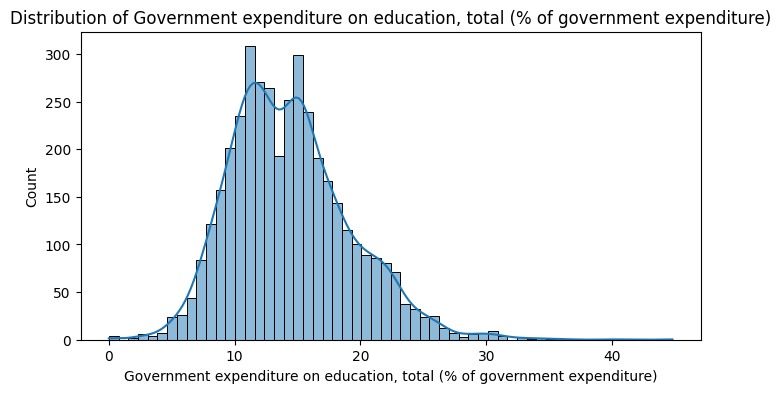


Correlation Analysis:


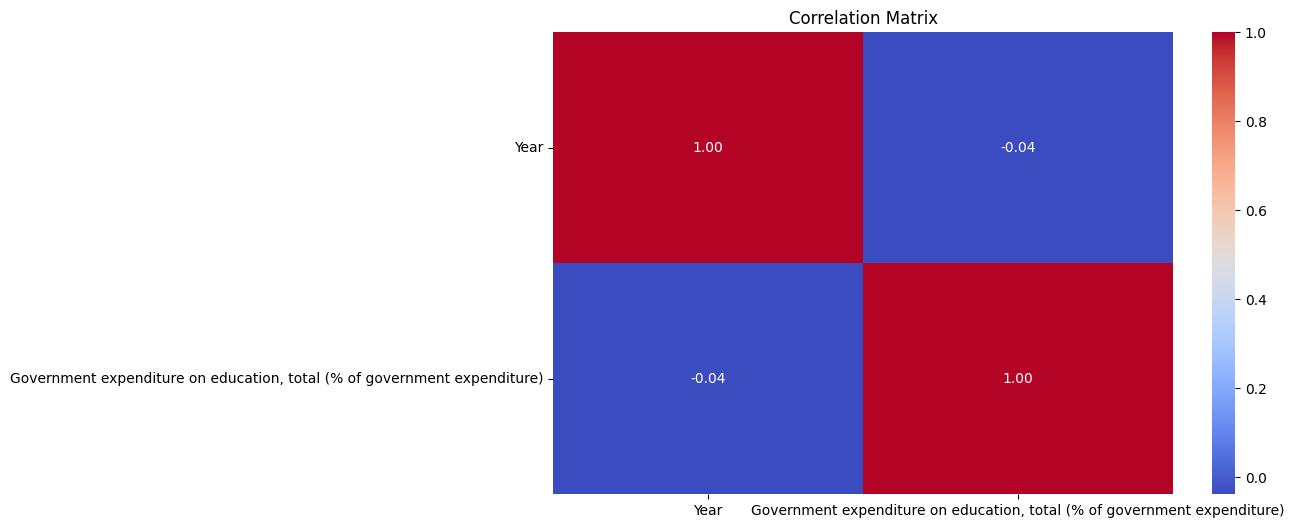


Outliers:
Year: 29 outliers (0.73%)
Government expenditure on education, total (% of government expenditure): 58 outliers (1.46%)


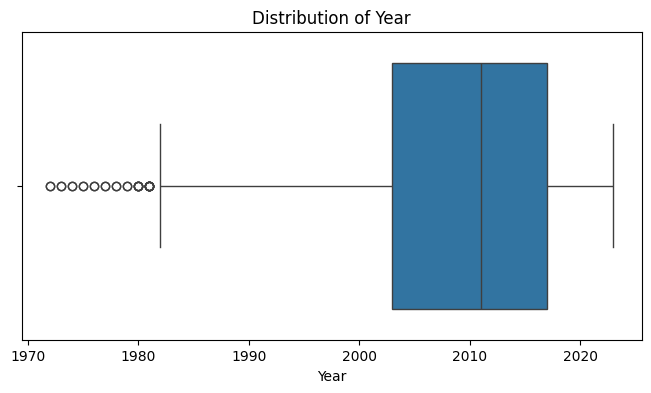

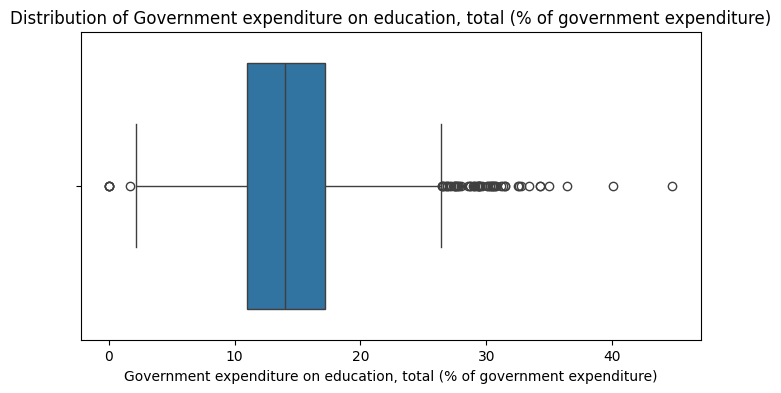

In [6]:
eda(df_education_expenditure, full=True)

### EDA Education vs GDP

Dataset Overview:
Number of Rows, Columns: (59839, 7)

First Five Rows:
        Entity Code  Year  Average years of schooling  \
0  Afghanistan  AFG  1990                    0.871962   
1  Afghanistan  AFG  1991                    0.915267   
2  Afghanistan  AFG  1992                    0.958573   
3  Afghanistan  AFG  1993                    1.001878   
4  Afghanistan  AFG  1994                    1.045184   

   GDP per capita, PPP (constant 2021 international $)  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Population (historical) World regions according to OWID  
0               12045622.0                             NaN  
1               12238831.0                             NaN  
2               13278937.0                           

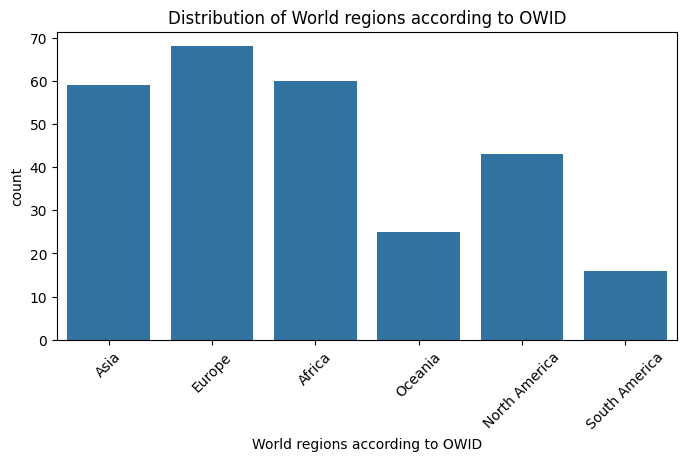

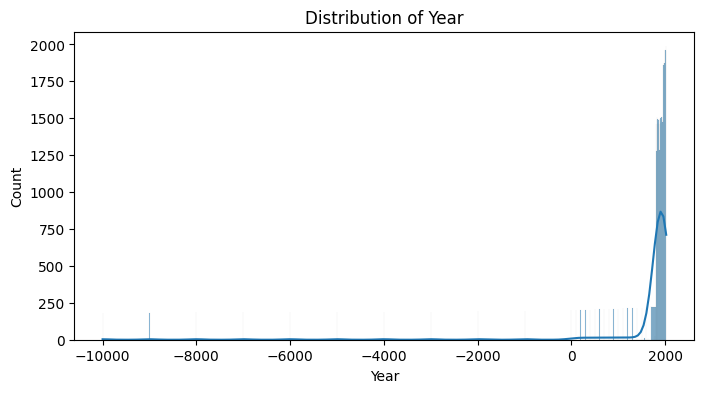

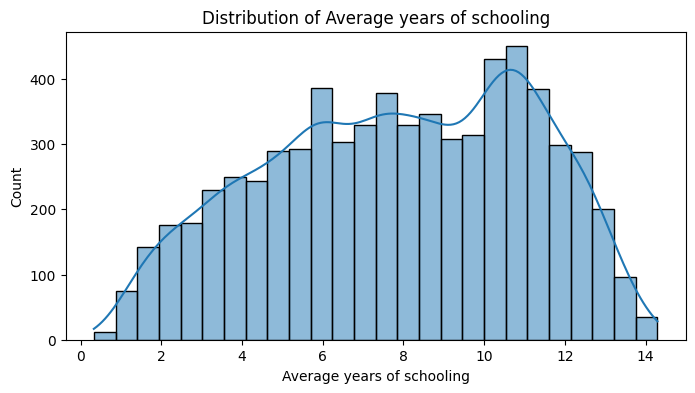

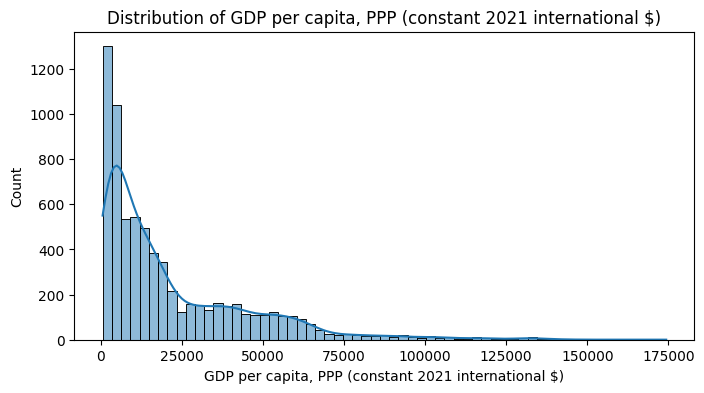

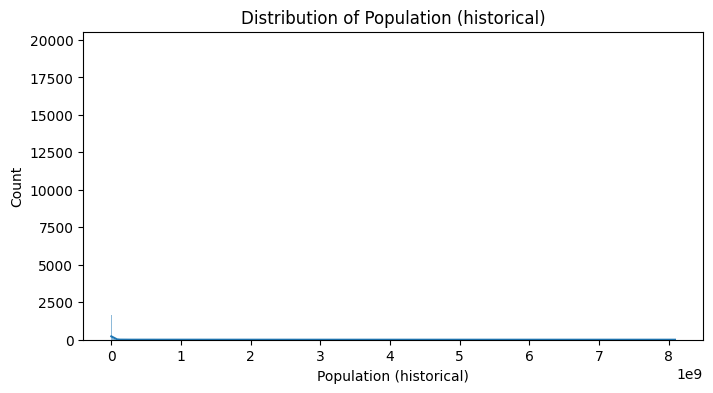


Correlation Analysis:


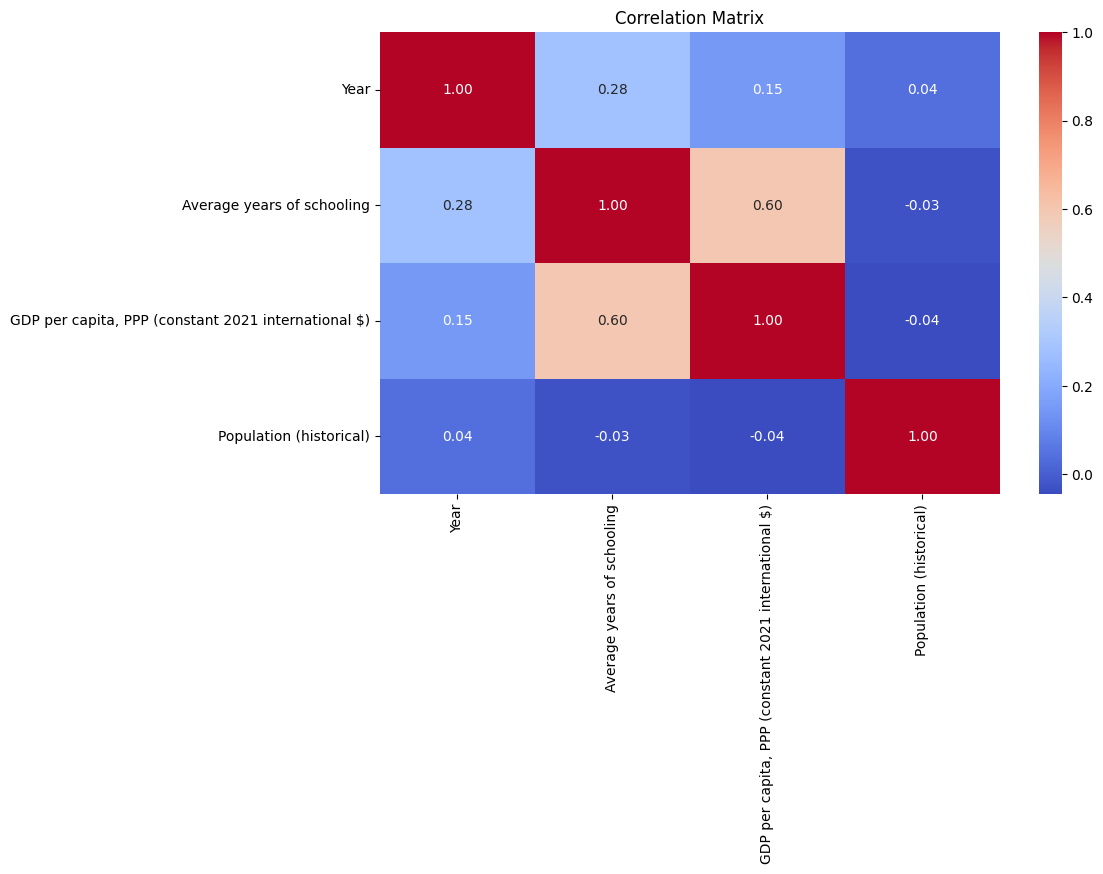


Outliers:
Year: 5446 outliers (9.10%)
Average years of schooling: 0 outliers (0.00%)
GDP per capita, PPP (constant 2021 international $): 267 outliers (0.45%)
Population (historical): 9415 outliers (15.73%)


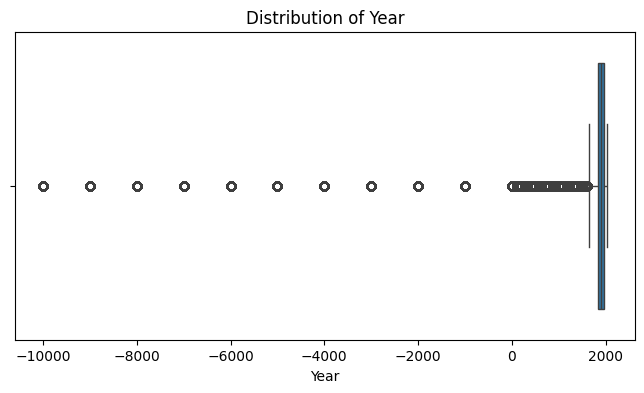

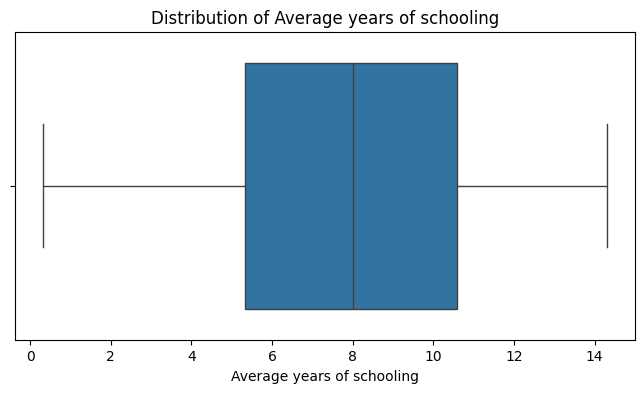

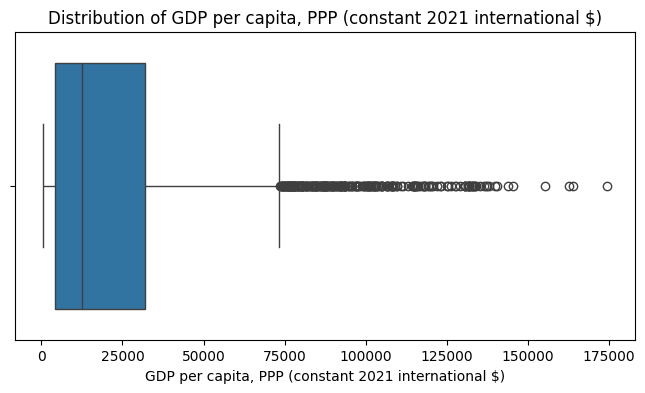

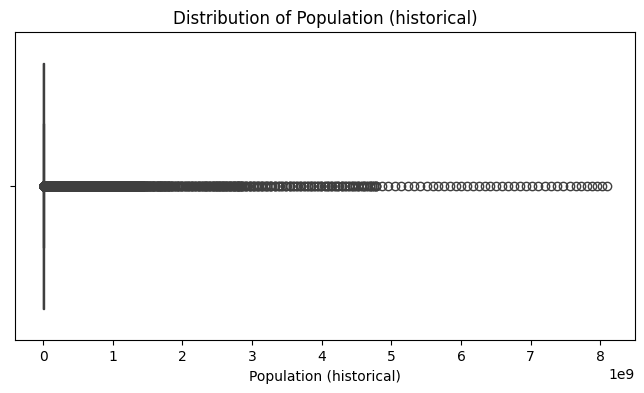

In [7]:
eda(df_education_gdp, full=True)

### EDA Education vs Productivity

Dataset Overview:
Number of Rows, Columns: (59839, 7)

First Five Rows:
        Entity Code  Year  Productivity: output per hour worked  \
0  Afghanistan  AFG  1870                                   NaN   
1  Afghanistan  AFG  1875                                   NaN   
2  Afghanistan  AFG  1880                                   NaN   
3  Afghanistan  AFG  1885                                   NaN   
4  Afghanistan  AFG  1890                                   NaN   

   Combined - average years of education for 15-64 years male and female youth and adults  \
0                                               0.01                                        
1                                               0.01                                        
2                                               0.01                                        
3                                               0.01                                        
4                                               0.01        

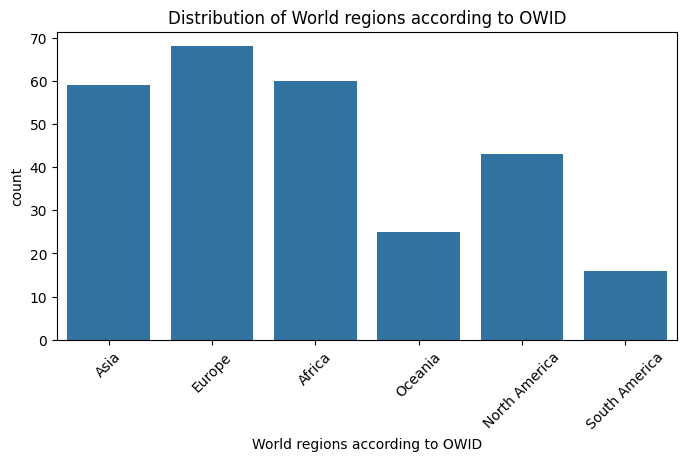

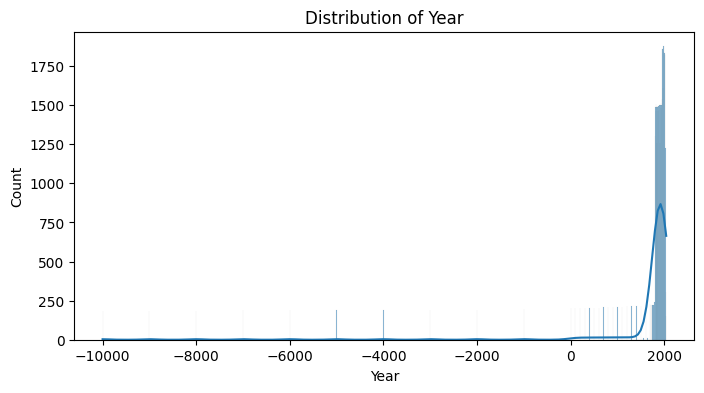

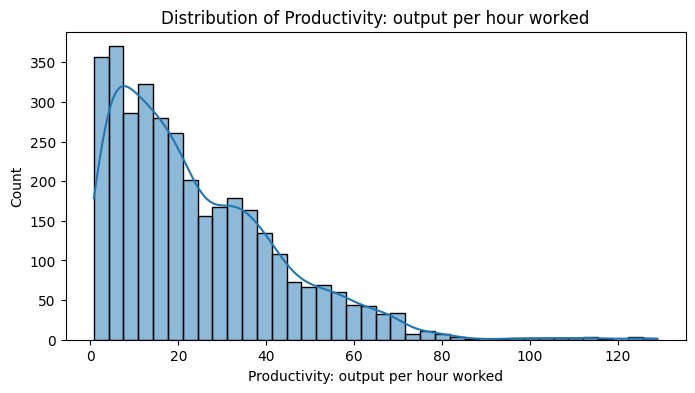

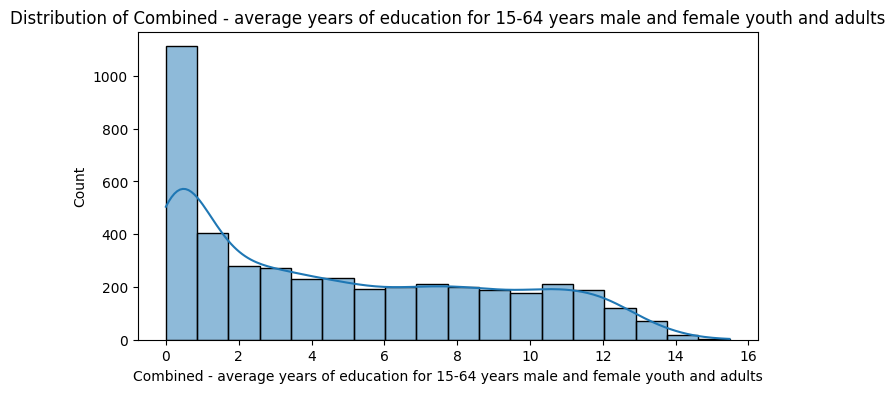

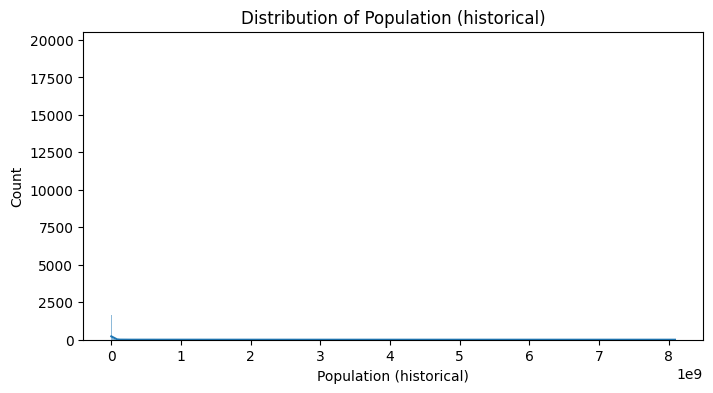


Correlation Analysis:


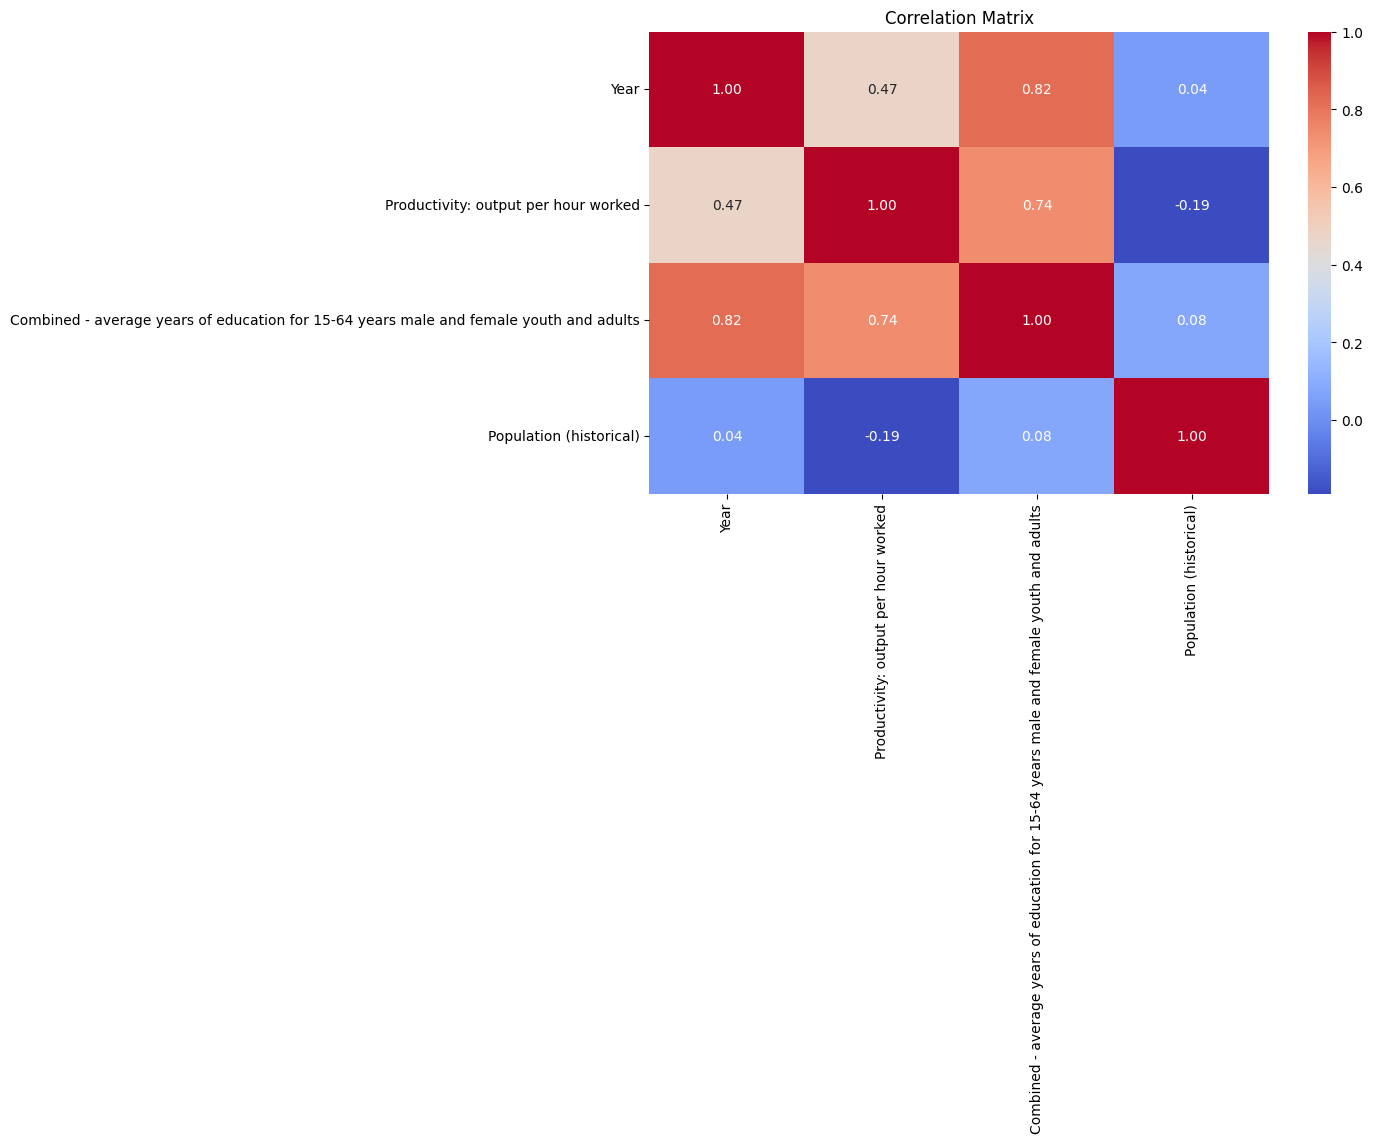


Outliers:
Year: 5446 outliers (9.10%)
Productivity: output per hour worked: 48 outliers (0.08%)
Combined - average years of education for 15-64 years male and female youth and adults: 0 outliers (0.00%)
Population (historical): 9415 outliers (15.73%)


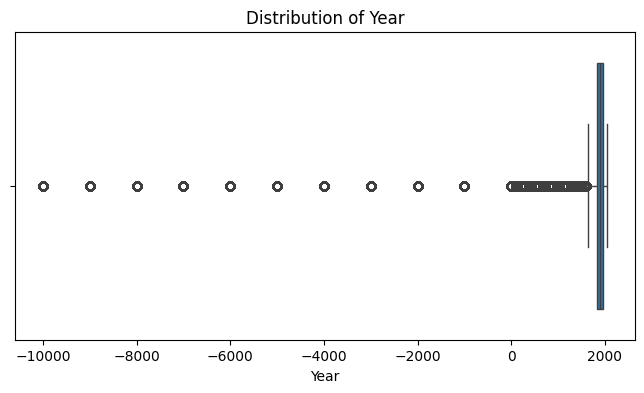

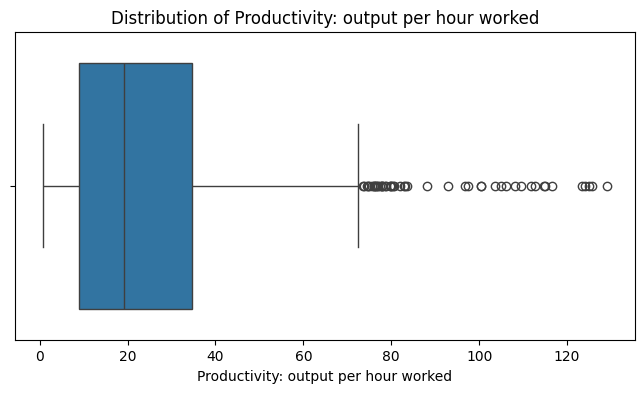

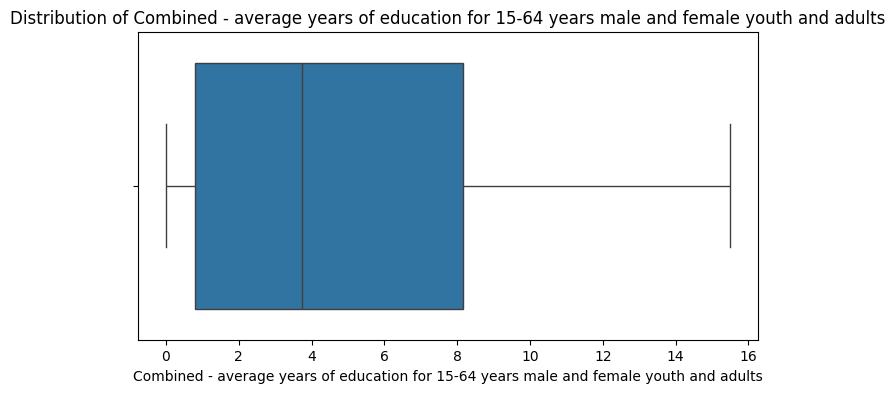

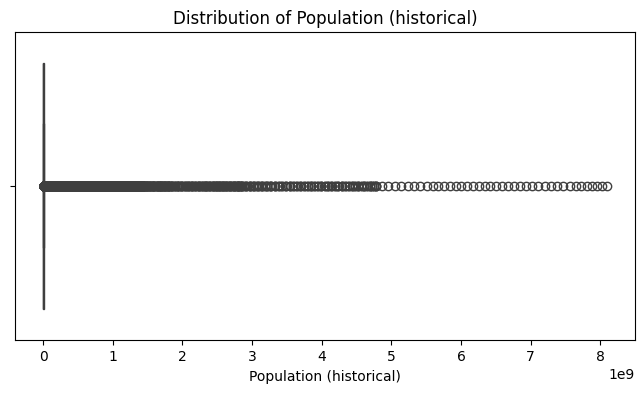

In [8]:
eda(df_education_productivity, full=True)

### EDA Unemployment Rate

Dataset Overview:
Number of Rows, Columns: (6630, 4)

First Five Rows:
        Entity Code  Year  \
0  Afghanistan  AFG  1991   
1  Afghanistan  AFG  1992   
2  Afghanistan  AFG  1993   
3  Afghanistan  AFG  1994   
4  Afghanistan  AFG  1995   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  
0                                              7.946                    
1                                              7.940                    
2                                              7.961                    
3                                              7.980                    
4                                              7.967                    

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 4 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  

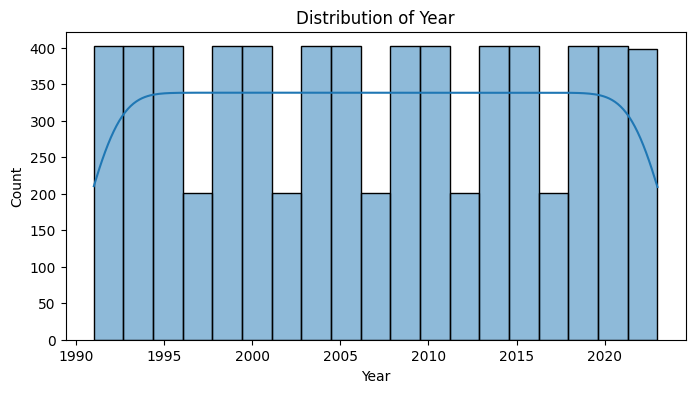

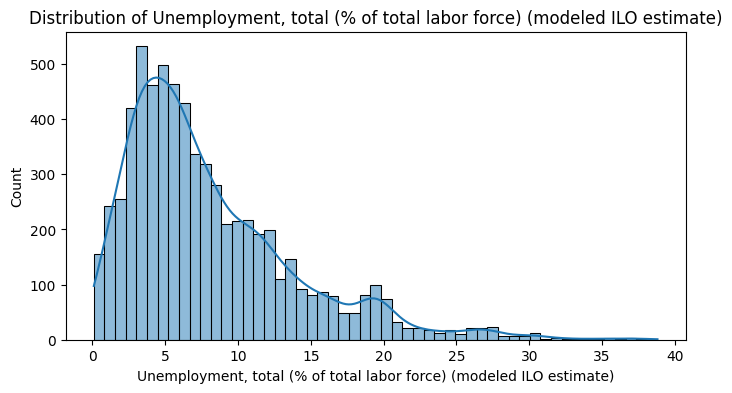


Correlation Analysis:


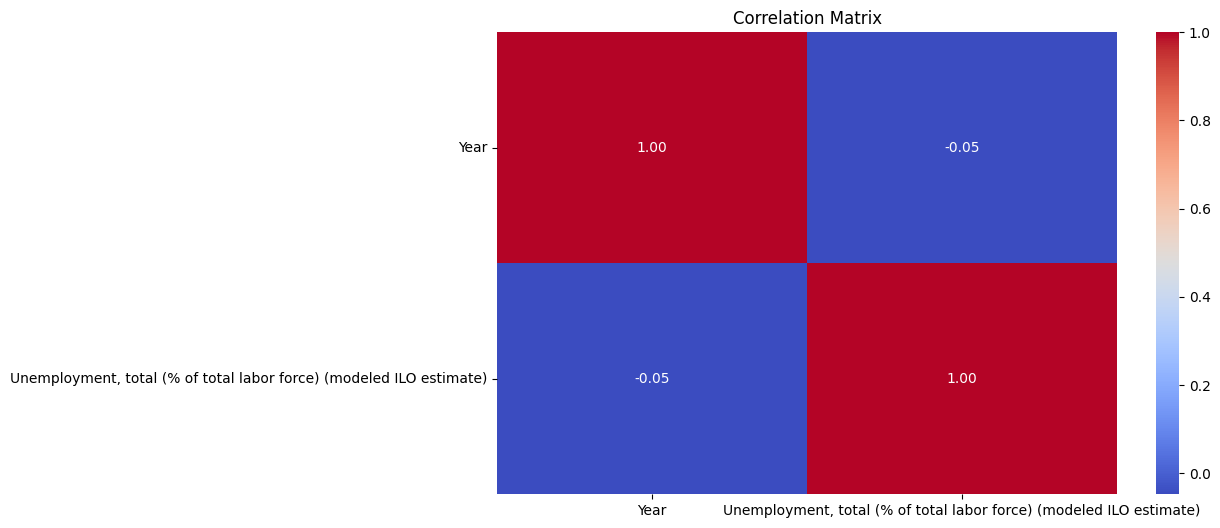


Outliers:
Year: 0 outliers (0.00%)
Unemployment, total (% of total labor force) (modeled ILO estimate): 224 outliers (3.38%)


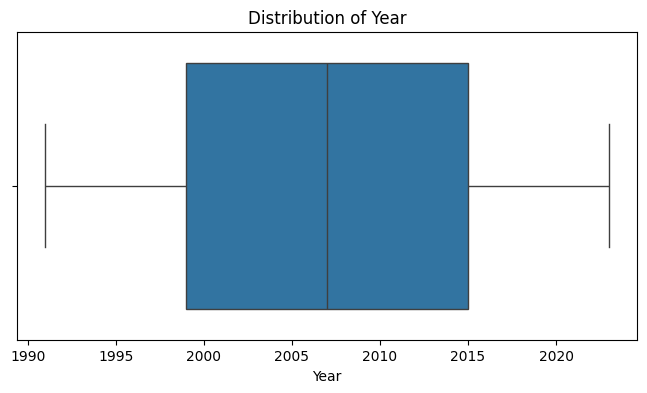

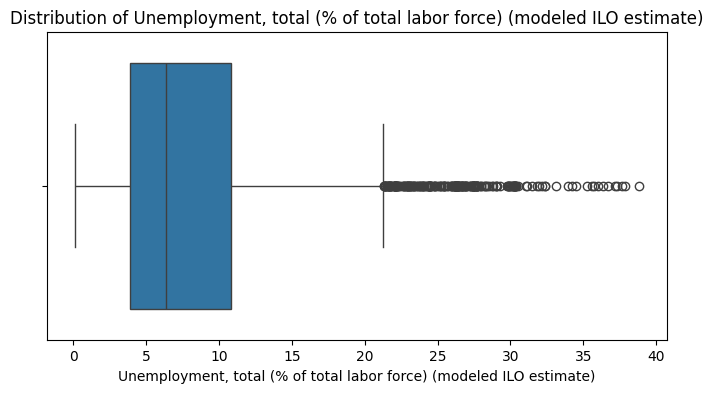

In [9]:
eda(df_unemployment, full=True)

### EDA Education vs Literacy Rate

Dataset Overview:
Number of Rows, Columns: (60402, 7)

First Five Rows:
        Entity Code  Year  Literacy rate  \
0  Afghanistan  AFG  1979       18.00000   
1  Afghanistan  AFG  2011       31.00000   
2  Afghanistan  AFG  2015       33.75384   
3  Afghanistan  AFG  2021       37.00000   
4  Afghanistan  AFG  1870            NaN   

   Combined - average years of education for 15-64 years male and female youth and adults  \
0                                                NaN                                        
1                                                NaN                                        
2                                               4.81                                        
3                                                NaN                                        
4                                               0.01                                        

   Population (historical) World regions according to OWID  
0               13655537.0                 

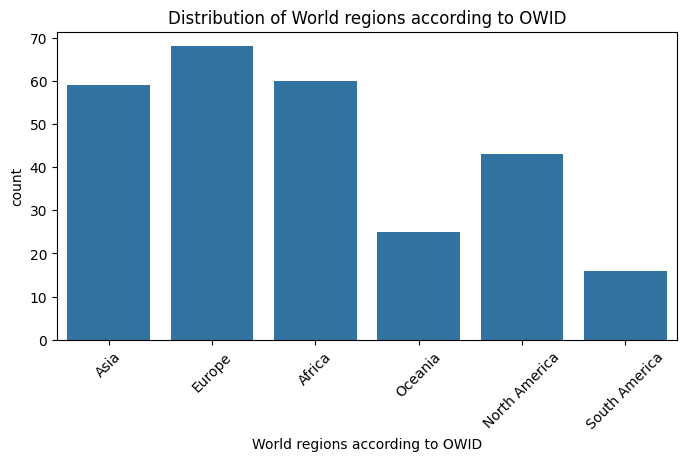

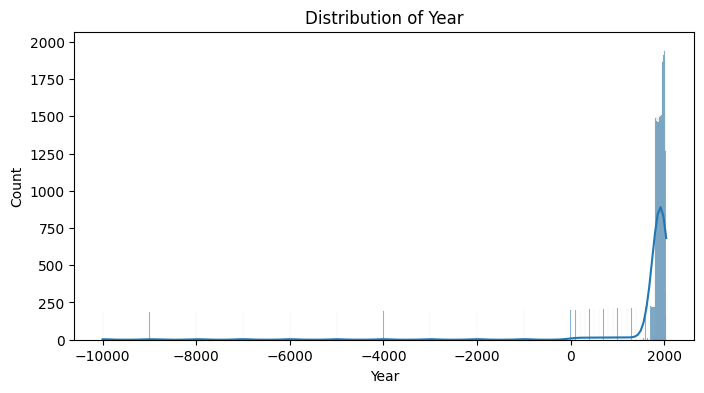

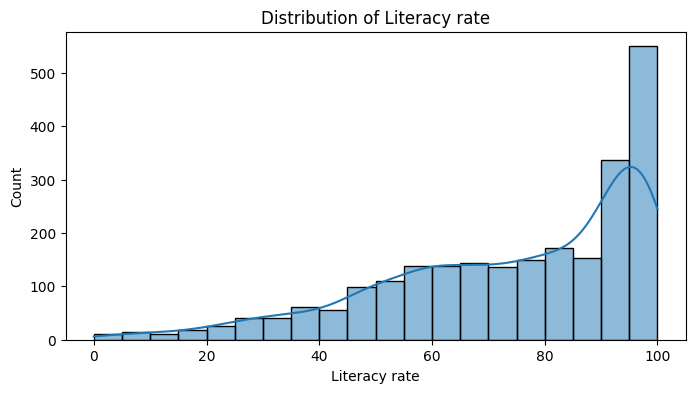

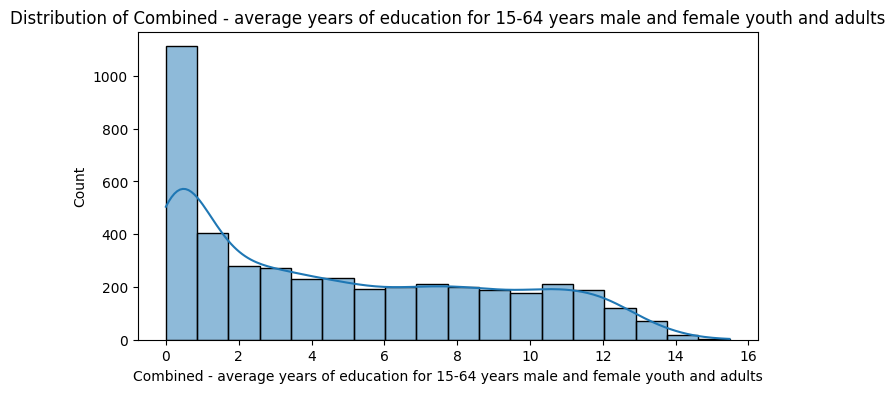

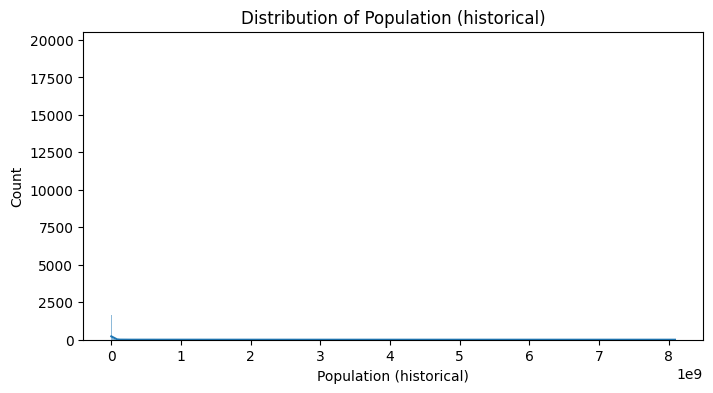


Correlation Analysis:


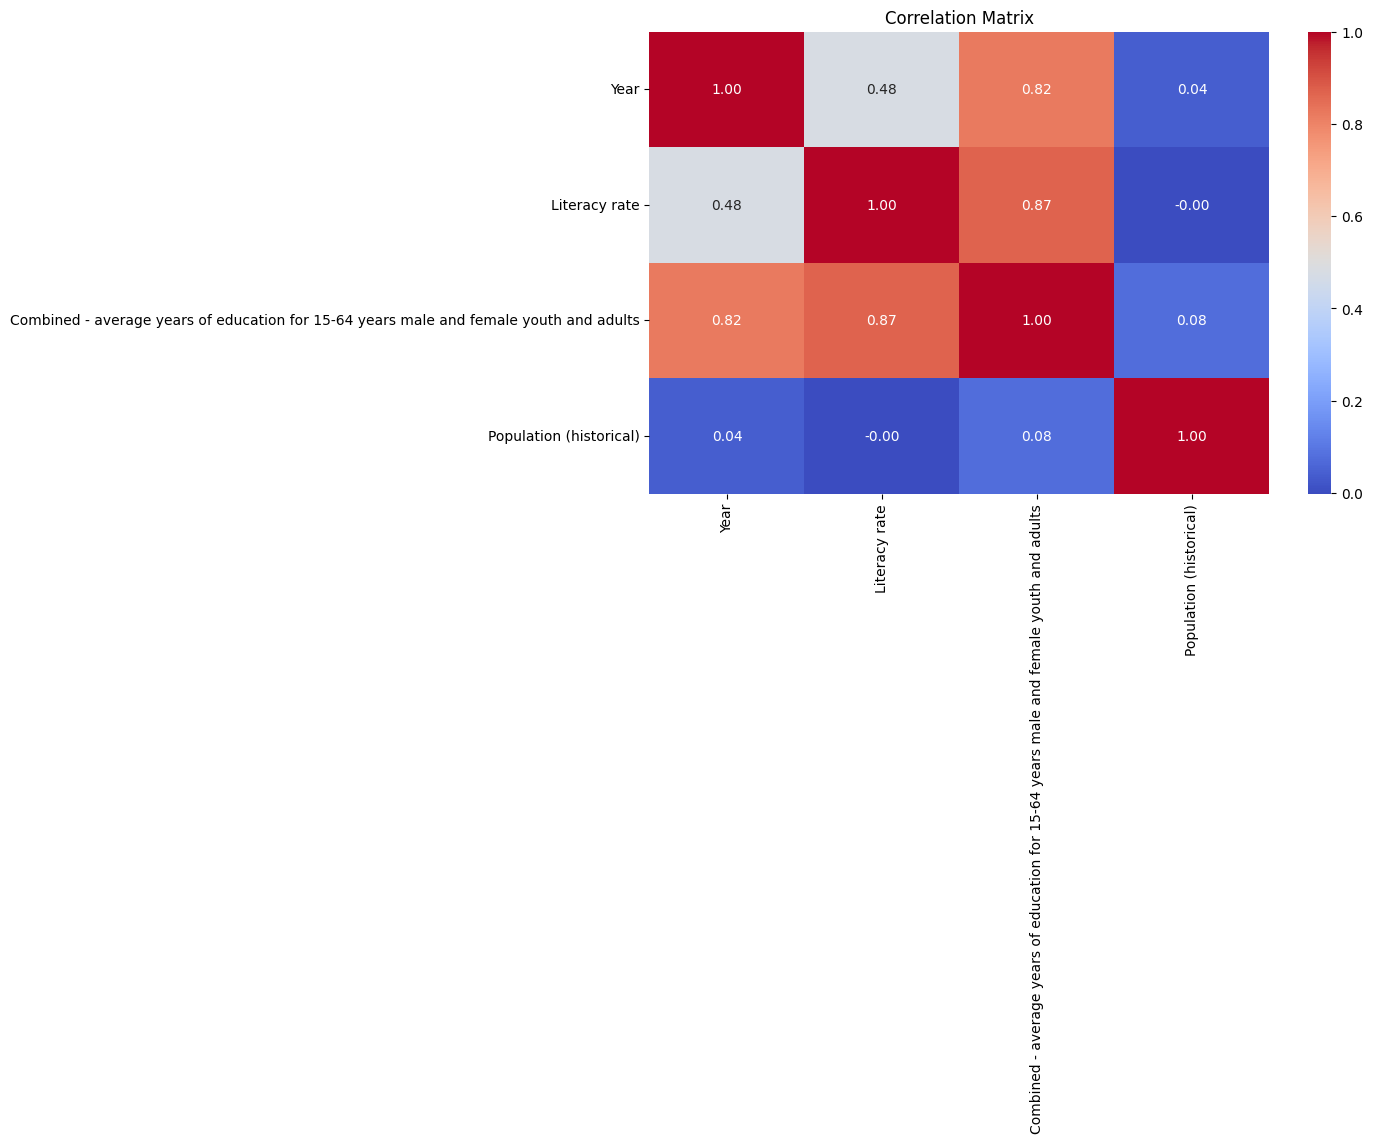


Outliers:
Year: 5466 outliers (9.05%)
Literacy rate: 15 outliers (0.02%)
Combined - average years of education for 15-64 years male and female youth and adults: 0 outliers (0.00%)
Population (historical): 9415 outliers (15.59%)


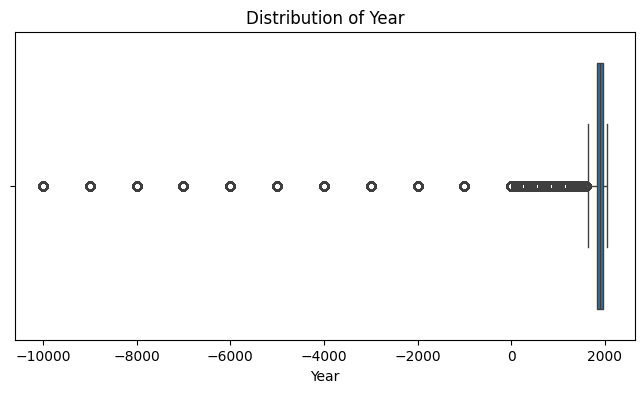

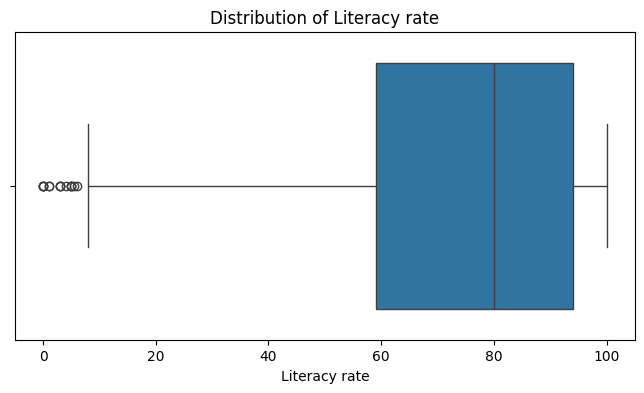

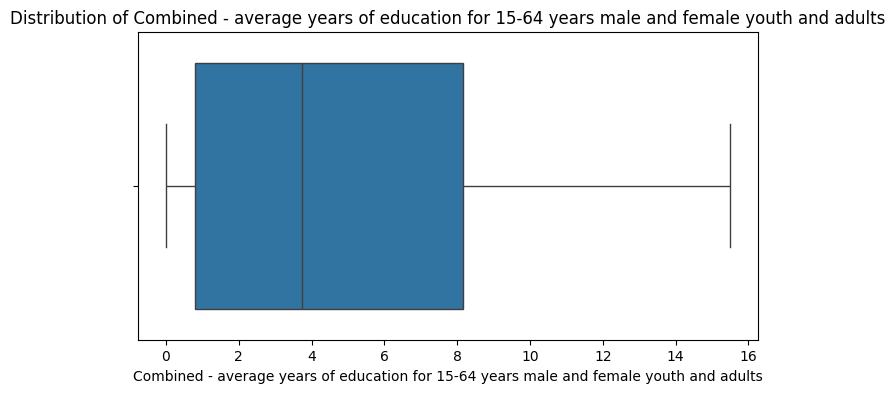

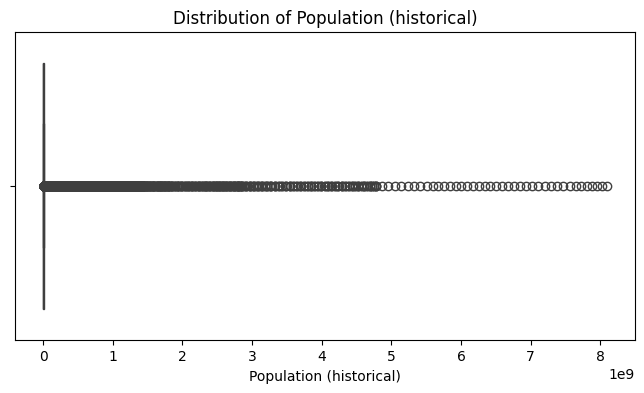

In [10]:
eda(df_education_literacy, full=True)

### EDA Education vs Poverty

Dataset Overview:
Number of Rows, Columns: (60358, 8)

First Five Rows:
        Entity Code  Year  \
0  Afghanistan  AFG  1870   
1  Afghanistan  AFG  1875   
2  Afghanistan  AFG  1880   
3  Afghanistan  AFG  1885   
4  Afghanistan  AFG  1890   

   Combined - average years of education for 15-64 years male and female youth and adults  \
0                                               0.01                                        
1                                               0.01                                        
2                                               0.01                                        
3                                               0.01                                        
4                                               0.01                                        

   $3.65 a day - Share of population in poverty 990308-annotations  \
0                                           NaN                NaN   
1                                           NaN       

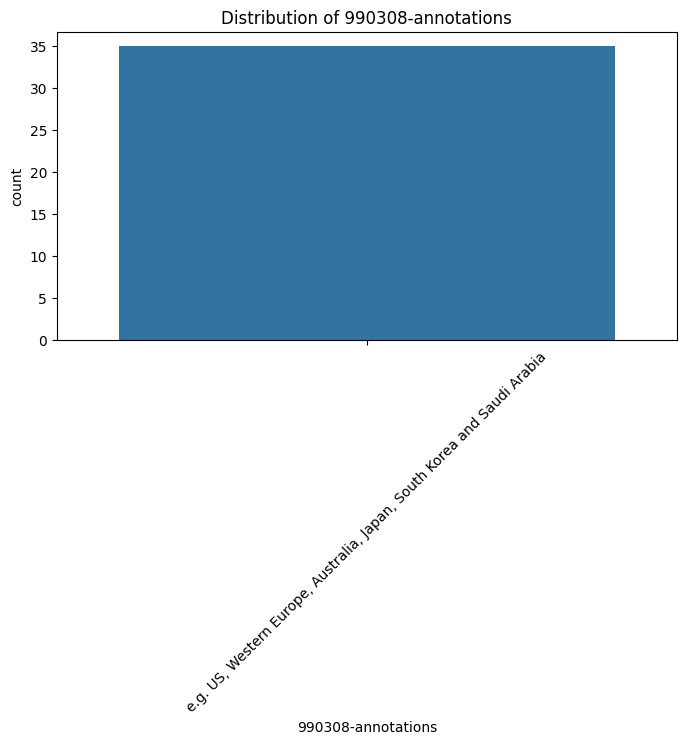


World regions according to OWID Value Counts:
World regions according to OWID
Europe           68
Africa           60
Asia             59
North America    43
Oceania          25
South America    16
Name: count, dtype: int64


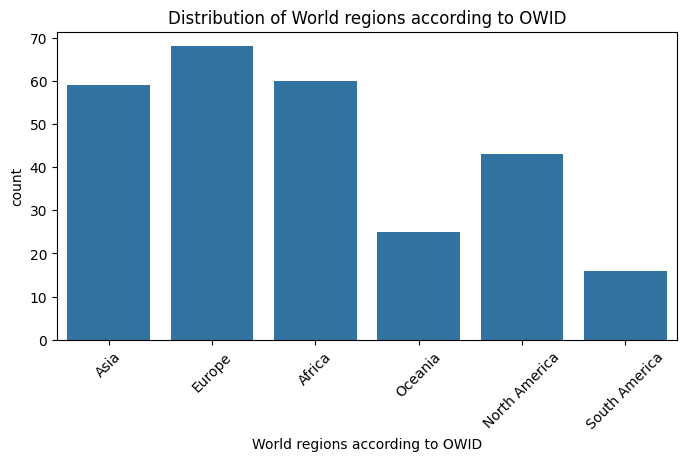

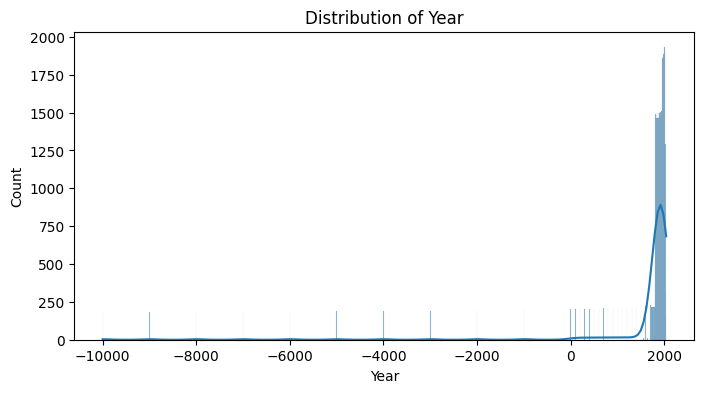

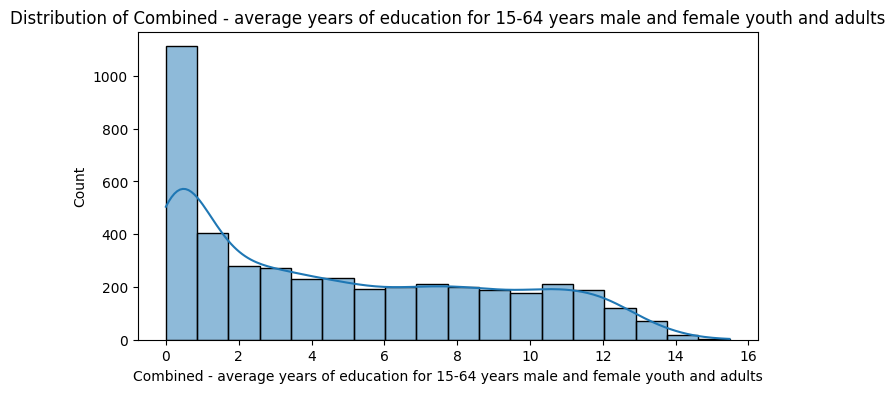

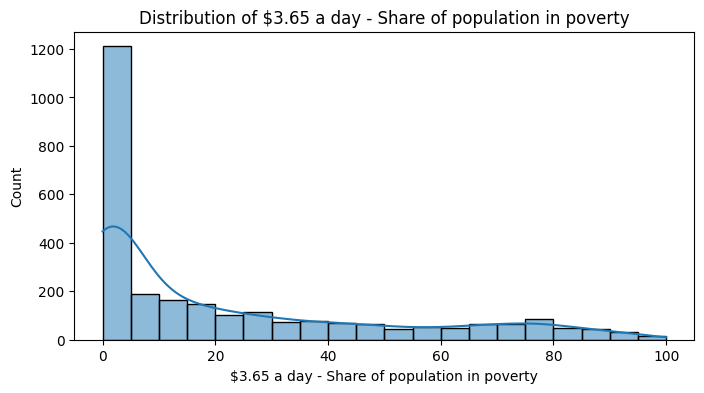

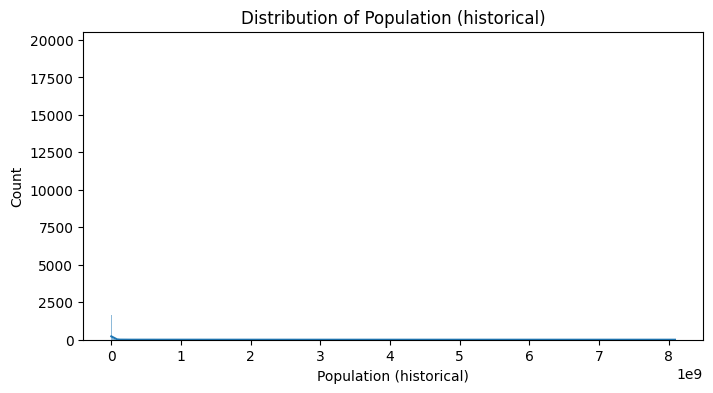


Correlation Analysis:


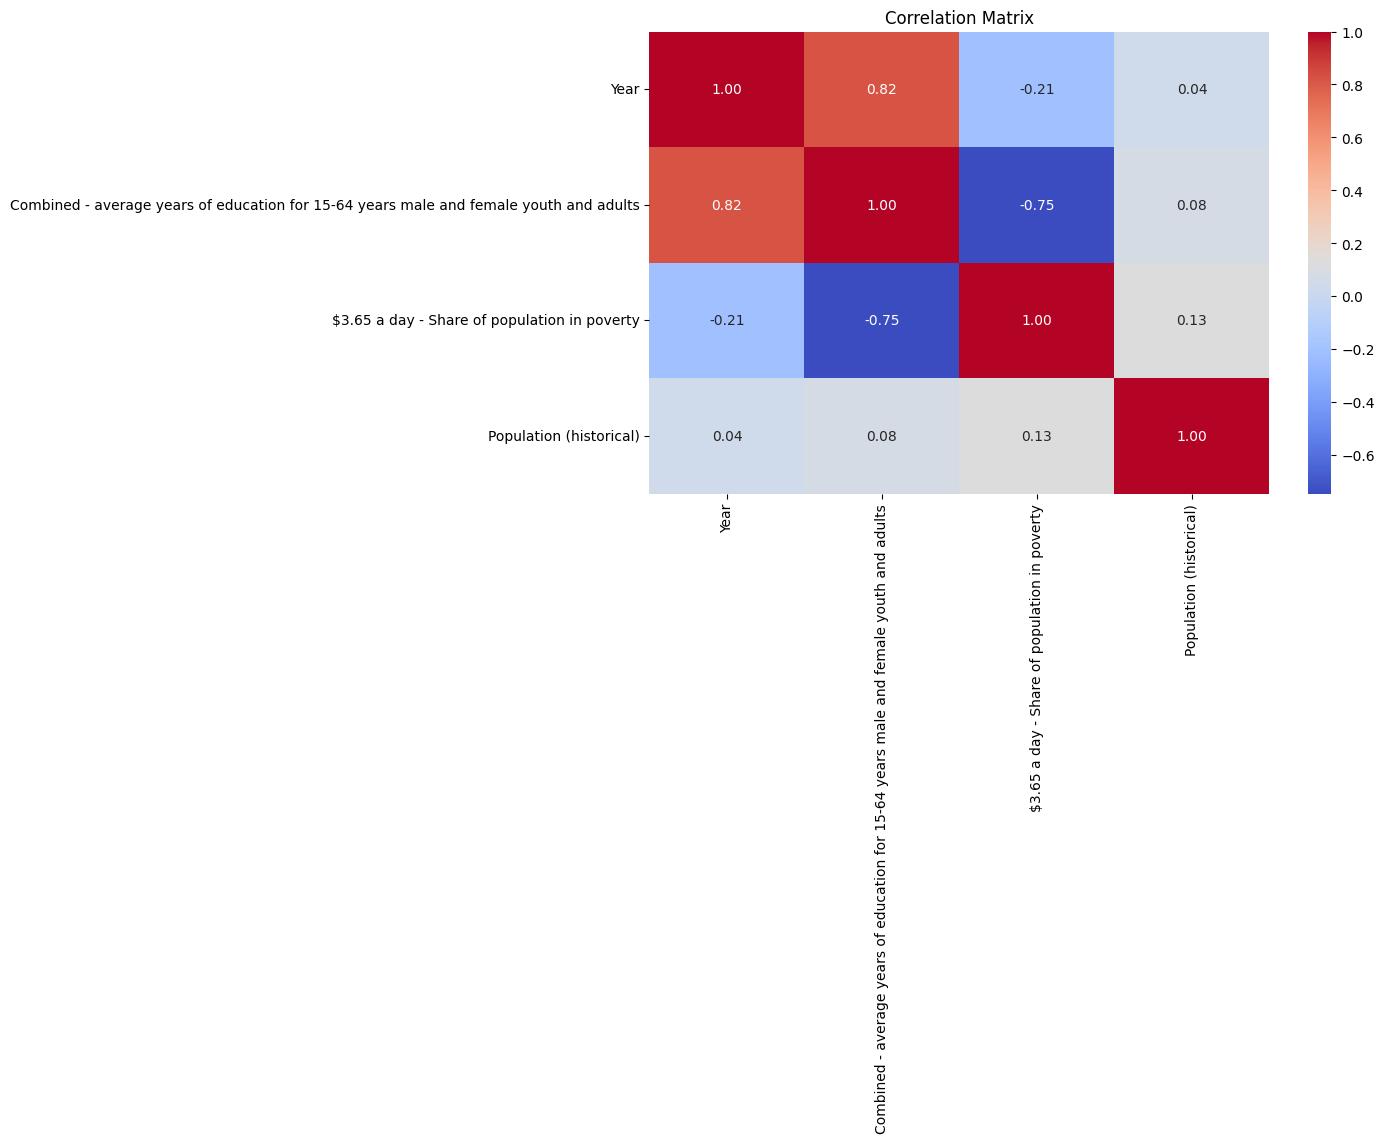


Outliers:
Year: 5446 outliers (9.02%)
Combined - average years of education for 15-64 years male and female youth and adults: 0 outliers (0.00%)
$3.65 a day - Share of population in poverty: 36 outliers (0.06%)
Population (historical): 9415 outliers (15.60%)


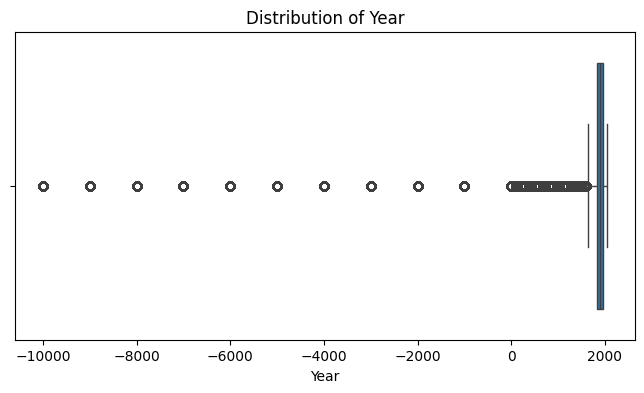

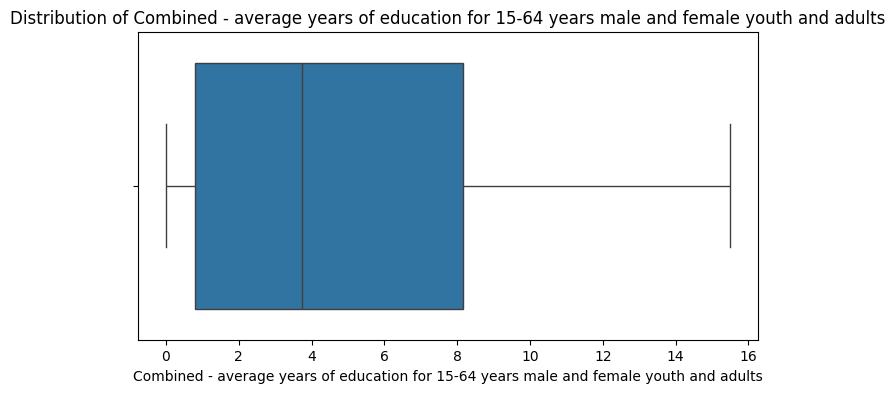

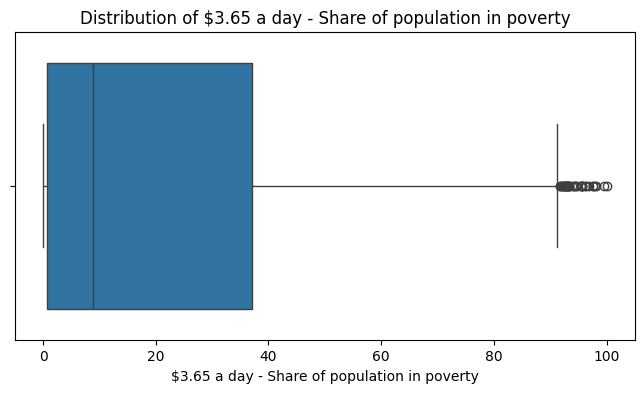

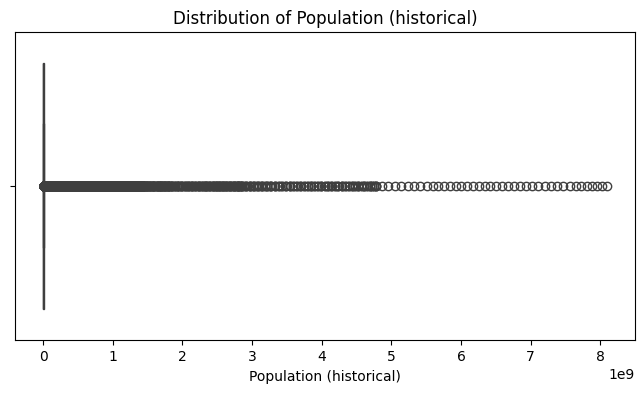

In [11]:
eda(df_education_poverty, full=True)

## Data Cleaning

In [12]:
# show all columns each dataframe
for df in df_list:
    print(df.columns)

Index(['Entity', 'Code', 'Year',
       'Government expenditure on education, total (% of government expenditure)'],
      dtype='object')
Index(['Entity', 'Code', 'Year', 'Average years of schooling',
       'GDP per capita, PPP (constant 2021 international $)',
       'Population (historical)', 'World regions according to OWID'],
      dtype='object')
Index(['Entity', 'Code', 'Year', 'Productivity: output per hour worked',
       'Combined - average years of education for 15-64 years male and female youth and adults',
       'Population (historical)', 'World regions according to OWID'],
      dtype='object')
Index(['Entity', 'Code', 'Year',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype='object')
Index(['Entity', 'Code', 'Year', 'Literacy rate',
       'Combined - average years of education for 15-64 years male and female youth and adults',
       'Population (historical)', 'World regions according to OWID'],
      dtype='object')
Index(['E

In [113]:
df_education_poverty['990308-annotations'].isnull().sum()

60323

In [107]:
# show all rows that is not nan df_education_poverty['990308-annotations']
df_education_poverty['990308-annotations'].dropna(axis=0, how='any')

40842    e.g. US, Western Europe, Australia, Japan, Sou...
40843    e.g. US, Western Europe, Australia, Japan, Sou...
40844    e.g. US, Western Europe, Australia, Japan, Sou...
40845    e.g. US, Western Europe, Australia, Japan, Sou...
40846    e.g. US, Western Europe, Australia, Japan, Sou...
40847    e.g. US, Western Europe, Australia, Japan, Sou...
40848    e.g. US, Western Europe, Australia, Japan, Sou...
40849    e.g. US, Western Europe, Australia, Japan, Sou...
40850    e.g. US, Western Europe, Australia, Japan, Sou...
40851    e.g. US, Western Europe, Australia, Japan, Sou...
40852    e.g. US, Western Europe, Australia, Japan, Sou...
40853    e.g. US, Western Europe, Australia, Japan, Sou...
40854    e.g. US, Western Europe, Australia, Japan, Sou...
40855    e.g. US, Western Europe, Australia, Japan, Sou...
40856    e.g. US, Western Europe, Australia, Japan, Sou...
40857    e.g. US, Western Europe, Australia, Japan, Sou...
40858    e.g. US, Western Europe, Australia, Japan, Sou.

In [10]:
df_education_literacy_cleaned = df_education_literacy.copy()
df_education_expenditure_cleaned = df_education_expenditure.copy()
df_education_gdp_cleaned = df_education_gdp.copy()
df_education_productivity_cleaned = df_education_productivity.copy()
df_unemployment_cleaned = df_unemployment.copy()
df_education_poverty_cleaned = df_education_poverty.copy()
df_list_cleaned = [
    df_education_literacy_cleaned,
    df_education_expenditure_cleaned,
    df_education_gdp_cleaned,
    df_education_productivity_cleaned,
    df_unemployment_cleaned,
    df_education_poverty_cleaned
]

In [13]:
# cleaning missing values
important_column = [
    'Government expenditure on education, total (% of government expenditure)',
    'Average years of schooling',
    'GDP per capita, PPP (constant 2021 international $)',
    'Productivity: output per hour worked',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Literacy rate',
    'Combined - average years of education for 15-64 years male and female youth and adults',
    '$3.65 a day - Share of population in poverty',
]
# cleaning missing values
# We need to modify the code to only check for columns that exist in each dataframe
for df in df_list_cleaned:
    # Get the intersection of important columns and existing columns in the dataframe
    columns_to_check = [col for col in important_column if col in df.columns]
    if columns_to_check:  # Only drop if there are columns to check
        df.dropna(subset=columns_to_check, inplace=True)

# cleaning duplicates
for df in df_list_cleaned:
    df.drop_duplicates(inplace=True)

# cleaning outliers


In [16]:
# Fill missing values by first using the 'Entity' group, then using 'Code' if available
df_education_literacy_cleaned['World regions according to OWID'] = df_education_literacy_cleaned['World regions according to OWID'].fillna(
    df_education_literacy.groupby('Entity')['World regions according to OWID'].transform(lambda x: x.ffill().bfill())
)

df_education_literacy_cleaned['World regions according to OWID'] = df_education_literacy_cleaned['World regions according to OWID'].fillna(
    df_education_literacy.groupby('Code')['World regions according to OWID'].transform(lambda x: x.ffill().bfill())
)

# fill the Entity 'World' with 'World'
df_education_literacy_cleaned['World regions according to OWID'] = df_education_literacy_cleaned['World regions according to OWID'].fillna('World')
df_education_literacy_cleaned

,Entity,Code,Year,Literacy rate,Combined - average years of education for 15-64 years male and female youth and adults,Population (historical),World regions according to OWID
2,Afghanistan,AFG,2015,33.75384,4.81,33831716.0,Asia
616,Albania,ALB,2015,97.55390,9.99,2898589.0,Europe
881,Algeria,DZA,2015,79.60840,7.55,40019473.0,Africa
2287,Argentina,ARG,1900,51.30000,0.97,4685089.0,South America
2288,Argentina,ARG,1910,60.40000,1.81,6748544.0,South America
...,...,...,...,...,...,...,...
59872,Zambia,ZMB,1990,65.00000,5.02,7786113.0,Africa
59876,Zambia,ZMB,2010,83.00000,7.40,13965529.0,Africa
59877,Zambia,ZMB,2015,85.11726,7.90,16399034.0,Africa
59879,Zambia,ZMB,2020,87.50000,8.37,19059354.0,Africa


## Data Transformation

## Data Grouping

In [37]:
# show unique values of year each dataframe
for df in df_list_cleaned:
    print(df['Year'].unique())

[2015 1900 1910 1920 1930 1940 1950 1960 1970 1980 2020 1975 2000 2010
 1990 2005 1870 1985 1995 1880 1890]
[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2005 2018
 2019 2020 2021 2022 2023 1998 2000 1999 2002 1996 2001 2003 2004 1995
 1997 1980 1981 1982 1983 1984 1985 1986 1987 1990 1991 1992 1993 1988
 1989 1994 1972 1973 1974 1975 1976 1977 1978 1979]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999]
[1975 1980 1985 1990 1995 2000 2005 2010 2015 1950 1955 1960 1965 1970]
[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023]
[2005 2015 2020 1995 1985 2010 2000 1990 1975 1970 1980 1965]


In [43]:
# Merge Data in df_list
def join_table(df_list: list, join_key=['Entity', 'Year'], method='outer'):
    result = df_list[0]
    for df in df_list[1:]:
        # Merge with distinct suffixes to differentiate overlapping columns
        result = pd.merge(result, df, on=join_key, how=method, suffixes=('', '_dup'))
        
        # Drop duplicate columns created during merge
        duplicate_cols = [col for col in result.columns if col.endswith('_dup')]
        result.drop(columns=duplicate_cols, inplace=True)
    return result

In [46]:
df_all = join_table(df_list_cleaned)
# 990308-annotations drop this column
df_all.drop(columns=['990308-annotations'], inplace=True)
df_all

,Entity,Code,Year,Literacy rate,Combined - average years of education for 15-64 years male and female youth and adults,Population (historical),World regions according to OWID,"Government expenditure on education, total (% of government expenditure)",Average years of schooling,"GDP per capita, PPP (constant 2021 international $)",Productivity: output per hour worked,"Unemployment, total (% of total labor force) (modeled ILO estimate)",$3.65 a day - Share of population in poverty
0,Afghanistan,AFG,2015,33.75384,4.81,33831716.0,Asia,7.284905,2.124310,2967.6921,NaN,9.011,NaN
1,Albania,ALB,2015,97.55390,9.99,2898589.0,Europe,10.441024,9.998020,13306.4430,NaN,17.193,3.519393
2,Algeria,DZA,2015,79.60840,7.55,40019473.0,Africa,16.084555,6.300135,15239.5180,NaN,11.206,NaN
3,Argentina,ARG,1900,51.30000,0.97,4685089.0,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1910,60.40000,1.81,6748544.0,South America,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7803,Yemen,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.215,NaN
7804,Cote d'Ivoire,NaN,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.922955
7805,Poland,NaN,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
7806,Taiwan,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.249923


In [49]:
df_all = join_table(df_list_cleaned, method='left')
# 990308-annotations drop this column
df_all.drop(columns=['990308-annotations'], inplace=True)
df_all

,Entity,Code,Year,Literacy rate,Combined - average years of education for 15-64 years male and female youth and adults,Population (historical),World regions according to OWID,"Government expenditure on education, total (% of government expenditure)",Average years of schooling,"GDP per capita, PPP (constant 2021 international $)",Productivity: output per hour worked,"Unemployment, total (% of total labor force) (modeled ILO estimate)",$3.65 a day - Share of population in poverty
0,Afghanistan,AFG,2015,33.75384,4.81,33831716.0,Asia,7.284905,2.124310,2967.6921,NaN,9.011,NaN
1,Albania,ALB,2015,97.55390,9.99,2898589.0,Europe,10.441024,9.998020,13306.4430,NaN,17.193,3.519393
2,Algeria,DZA,2015,79.60840,7.55,40019473.0,Africa,16.084555,6.300135,15239.5180,NaN,11.206,NaN
3,Argentina,ARG,1900,51.30000,0.97,4685089.0,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1910,60.40000,1.81,6748544.0,South America,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,Zambia,ZMB,1990,65.00000,5.02,7786113.0,Africa,NaN,4.480000,2425.1113,NaN,NaN,NaN
469,Zambia,ZMB,2010,83.00000,7.40,13965529.0,Africa,NaN,6.300964,3266.5076,NaN,13.190,80.831720
470,Zambia,ZMB,2015,85.11726,7.90,16399034.0,Africa,16.726110,6.756205,3576.9255,NaN,8.316,78.000960
471,Zambia,ZMB,2020,87.50000,8.37,19059354.0,Africa,12.378025,7.284893,3391.5955,NaN,6.032,NaN


In [52]:
df_all = join_table(df_list_cleaned, method='inner')
# 990308-annotations drop this column
df_all.drop(columns=['990308-annotations'], inplace=True)
df_all

,Entity,Code,Year,Literacy rate,Combined - average years of education for 15-64 years male and female youth and adults,Population (historical),World regions according to OWID,"Government expenditure on education, total (% of government expenditure)",Average years of schooling,"GDP per capita, PPP (constant 2021 international $)",Productivity: output per hour worked,"Unemployment, total (% of total labor force) (modeled ILO estimate)",$3.65 a day - Share of population in poverty
0,Brazil,BRA,2015,92.00000,7.66,2.016755e+08,South America,12.697980,7.510000,18357.0680,19.356064,8.538,9.283199
1,Bulgaria,BGR,2015,98.38858,10.71,7.177463e+06,Europe,9.690101,11.190000,24080.2560,24.152256,9.143,6.063518
2,Chile,CHL,2015,97.00000,10.49,1.804758e+07,South America,19.593710,10.260000,27821.1970,27.039087,6.605,1.546136
3,China,CHN,2010,95.00000,8.25,1.351561e+09,Asia,13.552069,7.060000,10267.8060,8.160233,4.530,33.522224
4,China,CHN,2015,96.35745,8.51,1.396134e+09,Asia,12.259830,7.532825,14575.9350,10.392884,4.650,9.932140
5,Costa Rica,CRI,2000,95.00000,7.96,3.937679e+06,North America,18.819510,7.558133,14187.7160,11.775538,5.080,14.775194
6,Costa Rica,CRI,2015,97.64725,8.77,4.817996e+06,North America,23.373430,8.580000,21510.9770,17.424700,8.415,4.386107
7,Croatia,HRV,2015,99.27259,11.80,4.183681e+06,Europe,10.464033,11.417611,29458.7000,30.722673,16.175,1.262994
8,Cyprus,CYP,2015,99.05978,12.10,1.219450e+06,Europe,13.863242,11.870000,38795.7100,41.750725,15.026,0.090627
9,Ecuador,ECU,2010,92.00000,8.02,1.507665e+07,South America,12.996560,7.850000,11651.3430,12.846698,4.088,15.132234


## Data Visualization

In [64]:
df_education_gdp_cleaned

,Entity,Code,Year,Average years of schooling,"GDP per capita, PPP (constant 2021 international $)",Population (historical),World regions according to OWID
10,Afghanistan,AFG,2000,1.264052,1617.8264,20130279.0,NaN
11,Afghanistan,AFG,2001,1.315551,1454.1108,20284252.0,NaN
12,Afghanistan,AFG,2002,1.367049,1774.3087,21378081.0,NaN
13,Afghanistan,AFG,2003,1.418548,1815.9282,22733007.0,NaN
14,Afghanistan,AFG,2004,1.470046,1776.9182,23560598.0,NaN
...,...,...,...,...,...,...,...
59607,Zimbabwe,ZWE,2019,8.687460,3294.8062,15271330.0,NaN
59608,Zimbabwe,ZWE,2020,8.808313,2987.2698,15526837.0,NaN
59609,Zimbabwe,ZWE,2021,8.930847,3184.7854,15797165.0,NaN
59610,Zimbabwe,ZWE,2022,8.930847,3323.1218,16069010.0,NaN


In [151]:
import plotly.express as px
import plotly.graph_objects as go

def plot_scatter_1(df, countries, x, y, size):
    # use the Entity='World' as a line
    df_world = df[df['Entity'] == 'World']
    fig = px.line(df_world, x='Year', y='GDP per capita, PPP (constant 2021 international $)', color='Entity', title='World GDP')
    df = df[df['Entity'].isin(countries)]
    fig = px.scatter(df, x=x, y=y, size=size, color='Entity', hover_name='Entity', log_x=True, size_max=20)
    fig.show()

def plot_scatter(df, countries, x, y, size):
    # Filter for 'World' entity to create a reference trend line
    df_world = df[df['Entity'] == 'World']
    
    # Create initial figure with the world trend
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df_world[x],
        y=df_world[y],
        mode='lines',
        name="World GDP Trend",
        line=dict(color="black", width=2),
    ))
    
    # Filter data for selected countries
    df_filtered = df[df['Entity'].isin(countries)]
    
    # Scale bubble sizes dynamically
    max_size = df_filtered[size].max()  # Get max population value
    min_size = df_filtered[size].min()  # Get min population value
    size_scaled = (df_filtered[size] - min_size) / (max_size - min_size) * 50 + 5  # Normalize to range [5, 55]

    # Add scatter points for selected countries with adjusted bubble sizes
    for country in countries:
        df_country = df_filtered[df_filtered['Entity'] == country]
        fig.add_trace(go.Scatter(
            x=df_country[x],
            y=df_country[y],
            mode='markers',
            marker=dict(
                size=((df_country[size] - min_size) / (max_size - min_size)) * 50 + 15,  # Rescale bubbles
                sizemode='area',
                opacity=0.75
            ),
            name=country,
            hovertext=country
        ))
    
    # Set layout properties
    fig.update_layout(
        title="Education vs GDP",
        xaxis_title=x,
        yaxis_title=y,
        xaxis=dict(type="log"),
        showlegend=True
    )

    fig.show()

def line_plot(df, countries, x, y):
    # Filter for 'World' entity to create a reference trend line
    df_world = df[df['Entity'] == 'World']
    fig = px.line(df_world, x='Average years of schooling', y='GDP per capita, PPP (constant 2021 international $)', color='Entity', title='World GDP')
    df = df[df['Entity'].isin(countries)]
    fig = px.line(df, x=x, y=y, color='Entity', hover_name='Entity', log_x=True)
    fig.show()

In [158]:
line_plot(df_education_gdp_cleaned, countries, 'GDP per capita, PPP (constant 2021 international $)', 'Average years of schooling')

In [162]:
# visualization for Education vs GDP using plotly df_education_gdp_cleaned

countries = df_education_gdp_cleaned['Entity'].unique()
countries = ['Indonesia', 'Malaysia', 'Singapore', 'Vietnam', 'Myanmar', 'Switzerland'] # 'World']
# x is Average years of schooling and y is GDP per capita, PPP (constant 2021 international $)
# Population (historical) is bubble size

#plot_scatter(df_education_gdp_cleaned, countries, 'Average years of schooling', 'GDP per capita, PPP (constant 2021 international $)', 'Population (historical)')
# change x and y switching x and y
plot_scatter(df_education_gdp_cleaned, countries, 'GDP per capita, PPP (constant 2021 international $)', 'Average years of schooling', 'Population (historical)')

In [94]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Sample data (replace with your actual df_education_gdp_cleaned)
df = df_education_gdp_cleaned

# Define the list of countries for selection
countries = ['World', 'Indonesia', 'Malaysia', 'Singapore', 'Vietnam', 'Myanmar']
countries = df['Entity'].unique()

# Create figure
fig = go.Figure()

# Get the unique years for animation
years = sorted(df['Year'].unique())

# Add traces dynamically based on the first year
for country in countries:
    df_filtered = df[(df['Entity'] == country) & (df['Year'] == years[0])]
    fig.add_trace(go.Scatter(
        x=df_filtered['Average years of schooling'],
        y=df_filtered['GDP per capita, PPP (constant 2021 international $)'],
        mode='markers',
        marker=dict(size=df_filtered['Population (historical)'] / 10000000, sizemode='area'),
        name=country,
        hovertext=country
    ))

# Create frames for animation (transition year by year)
frames = []
for year in years:
    frame_data = []
    for country in countries:
        df_filtered = df[(df['Entity'] == country) & (df['Year'] == year)]
        frame_data.append(go.Scatter(
            x=df_filtered['Average years of schooling'],
            y=df_filtered['GDP per capita, PPP (constant 2021 international $)'],
            mode='markers',
            marker=dict(size=df_filtered['Population (historical)'] / 10000000, sizemode='area'),
            name=country,
            hovertext=country
        ))
    frames.append(go.Frame(data=frame_data, name=str(year)))

fig.update(frames=frames)

# Adding animation buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(label="Play",
                     method="animate",
                     args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}]),
                dict(label="Pause",
                     method="animate",
                     args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])
            ]
        )
    ],
    sliders=[
        dict(
            steps=[dict(
                method="animate",
                args=[[str(year)], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate"}],
                label=str(year)
            ) for year in years],
            currentvalue={"prefix": "Year: "}
        )
    ]
)

# Set title and axes labels
fig.update_layout(
    title="Education vs GDP with Interactive Animation",
    xaxis_title="Average Years of Schooling",
    yaxis_title="GDP per capita, PPP (constant 2021 international $)",
    xaxis=dict(type="log")
)

fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73ea0ae4-bed4-42cf-a07d-8fcf53393f71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>